In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

Geographical Segentation

In [2]:
data=pd.read_csv("Fuel type Registration of Vehicles.csv")

In [3]:
data.tail()

,Month,CNG Only,DIESEL,Diesel/Hybrid,Electric (BOV),LPG Only,Petrol,Petrol/CNG,Petrol/Hybrid,Petrol/LPG,Ethanol,Not Applicable
55,Nov-21,"22,331","1,37,209",2,"42,098","1,662","15,88,245","17,016","11,714",548,NaN,"4,699"
56,Dec-21,"21,525","1,56,868",2,"50,915","1,399","13,02,529","18,756","9,919",496,NaN,"5,882"
57,Jan-22,"23,059","1,57,663",3,"48,169","1,241","11,74,882","26,727","10,809",485,NaN,"4,805"
58,Feb-22,"20,480","1,51,020",4,"54,046","1,018","11,13,704","30,363","9,359",315,NaN,"5,174"
59,Mar-22,"24,807","1,87,624",3,"77,199","1,276","12,87,888","34,965","8,072",524,1.0,"6,131"


In [4]:
data.columns

Index(['Month ', 'CNG Only ', 'DIESEL ', 'Diesel/Hybrid ', 'Electric (BOV) ',
       'LPG Only ', 'Petrol ', 'Petrol/CNG ', 'Petrol/Hybrid ', 'Petrol/LPG ',
       'Ethanol ', 'Not Applicable '],
      dtype='object')

In [5]:
data1 = data[['Month ','Electric (BOV) ']]

In [6]:
data1.head()

,Month,Electric (BOV)
0,Apr-17,"5,063"
1,May-17,"7,080"
2,Jun-17,"7,508"
3,Jul-17,"9,031"
4,Aug-17,"9,174"


Text(0, 0.5, 'Sales')

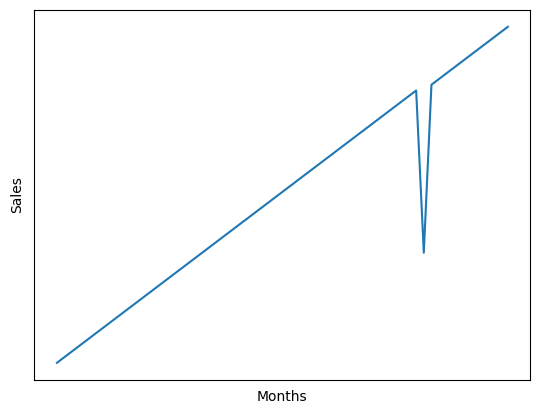

In [7]:
plt.plot(data1['Month '], data1['Electric (BOV) '])
plt.xticks([])
plt.yticks([])
plt.xlabel("Months")
plt.ylabel("Sales")

In [8]:
cs_data=pd.read_csv("State-wise-charging-stations.csv")

In [13]:
cs_data=cs_data.iloc[:-1,1:]

In [14]:
cs_data

,No. of Operational PCS
0,3
1,222
2,9
3,48
4,83
5,6
6,46
7,1845
8,44
9,195


In [15]:
cs_data.astype({'No. of Operational PCS': 'int'}).dtypes

No. of Operational PCS    int32
dtype: object

In [16]:
cs_data.sort_values(by=['No. of Operational PCS'], ascending=False).head()

,No. of Operational PCS
2,9
4,83
14,704
18,660
13,60


In [17]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()

In [19]:
ev_data=pd.read_csv("EV-registrations.csv")

In [20]:
ev_data

,Sr. No.,State Name,2- wheelers,3-wheelers,4-wheelers and above,Total Electric Vehicle Count,Total vehicle Count,Proportions
0,1,Andaman and Nicobar,18,30,134,182,"1,58,364",0.001149
1,2,Andhra Pradesh,"46,486","1,252","3,866","51,604","1,59,67,937",0.003232
2,3,Arunanchal Pradesh,15,0,9,24,"2,90,893",0.000082
3,4,Assam,"2,911","91,994",292,"95,197","51,82,509",0.018369
4,5,Bihar,"16,698","1,12,101",379,"1,29,178","1,12,44,838",0.011488
5,6,Chandigarh,"1,599","3,304",646,"5,549","8,25,228",0.006724
6,7,Chhattisgarh,"26,358","12,176","2,139","40,673","72,70,496",0.005594
7,8,Delhi,"54,530","1,37,663","11,395","2,03,588","1,40,15,426",0.014526
8,9,Goa,"7,543",75,"1,118","8,736","11,87,482",0.007357
9,10,Gujarat,"90,556","3,544","5,494","99,594","2,22,59,121",0.004474


In [21]:
ev_data=ev_data.iloc[:-1,1:]

In [22]:
ev_data.astype({'Proportions': 'int64'}).dtypes

State Name                      object
2- wheelers                     object
3-wheelers                      object
4-wheelers and above            object
Total Electric Vehicle Count    object
Total vehicle Count             object
Proportions                      int64
dtype: object

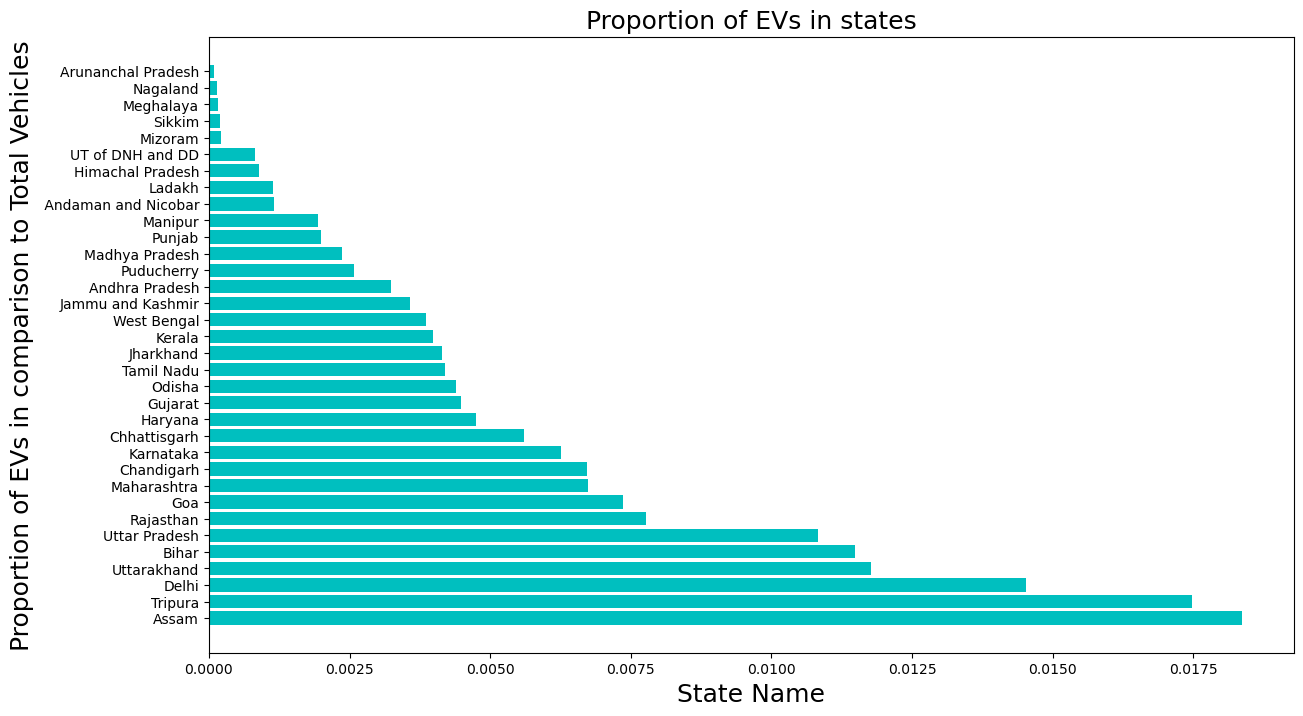

In [23]:
plot_frequency(ev_data, "State Name", "Proportions", "State Name", "Proportion of EVs in comparison to Total Vehicles", "Proportion of EVs in states", "c")

In [24]:
ev_data1=ev_data[["State Name", "2- wheelers", "3-wheelers", "4-wheelers and above"]]

In [25]:
ev_data1["2- wheelers"] = ev_data1["2- wheelers"].str.replace(',', '').astype(int)
ev_data1["3-wheelers"] = ev_data1["3-wheelers"].str.replace(',', '').astype(int)
ev_data1["4-wheelers and above"] = ev_data1["4-wheelers and above"].str.replace(',', '').astype(int)

C:\Users\rahul\AppData\Local\Temp\ipykernel_31284\1901636868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data1["2- wheelers"] = ev_data1["2- wheelers"].str.replace(',', '').astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_31284\1901636868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data1["3-wheelers"] = ev_data1["3-wheelers"].str.replace(',', '').astype(int)
C:\Users\rahul\AppData\Local\Temp\ipykernel_31284\1901636868.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [26]:
ev_data1

,State Name,2- wheelers,3-wheelers,4-wheelers and above
0,Andaman and Nicobar,18,30,134
1,Andhra Pradesh,46486,1252,3866
2,Arunanchal Pradesh,15,0,9
3,Assam,2911,91994,292
4,Bihar,16698,112101,379
5,Chandigarh,1599,3304,646
6,Chhattisgarh,26358,12176,2139
7,Delhi,54530,137663,11395
8,Goa,7543,75,1118
9,Gujarat,90556,3544,5494


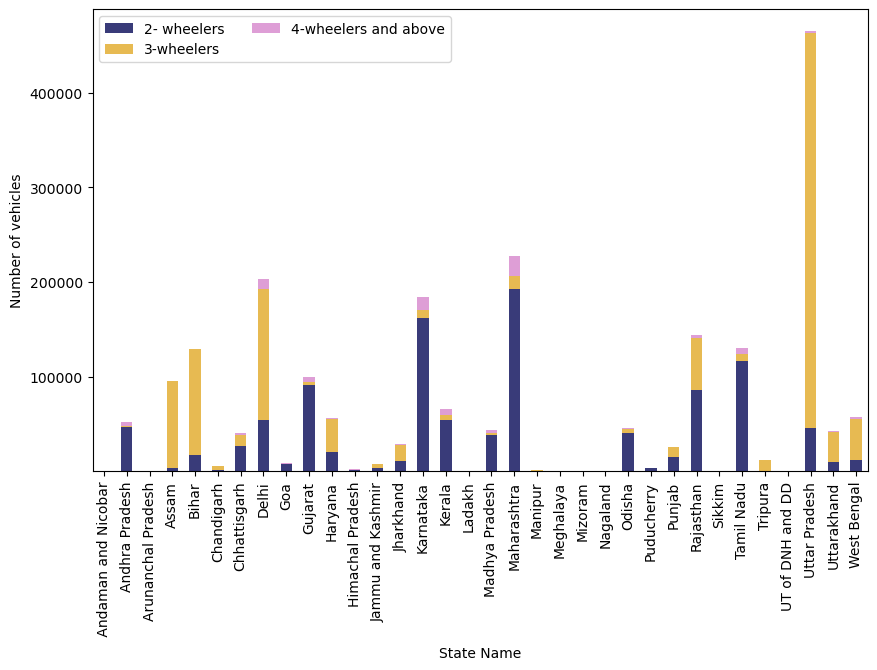

In [27]:
ev_data1.plot(kind="bar", x= "State Name", stacked=True, colormap='tab20b', figsize=(10,6))
'''plt.bar(ev_data1["State Name"], ev_data1["2- wheelers"], label="2-wheelers")
plt.bar(ev_data1["State Name"], ev_data1["3-wheelers"], bottom=ev_data1["2- wheelers"], label="3-wheelers")
plt.bar(ev_data1["State Name"], ev_data1["4-wheelers and above"], bottom=ev_data1["3-wheelers"], label="4-wheelers and above")'''
#plt.xticks(ev_data1["State Name"], rotation='vertical')
plt.legend(loc="upper left", ncol=2)
plt.xlabel("State Name")
plt.ylabel("Number of vehicles")
plt.show()


Behavioural Segmentation

In [28]:
bdata=pd.read_csv("behavioural_dataset.csv")

In [29]:
bdata

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [30]:
bdata.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Car_Loan', 'Total Salary', 'EV Price'],
      dtype='object')

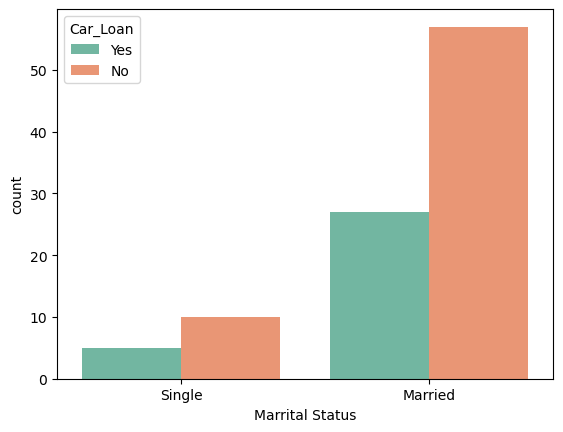

In [31]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = bdata, palette = 'Set2')
plt.show()

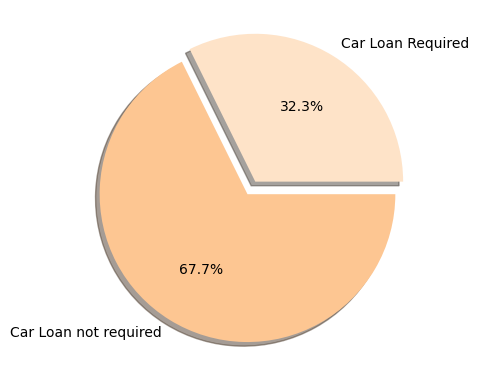

In [32]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [bdata.query('Car_Loan == "Yes"').Car_Loan.count(),bdata.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('Oranges')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

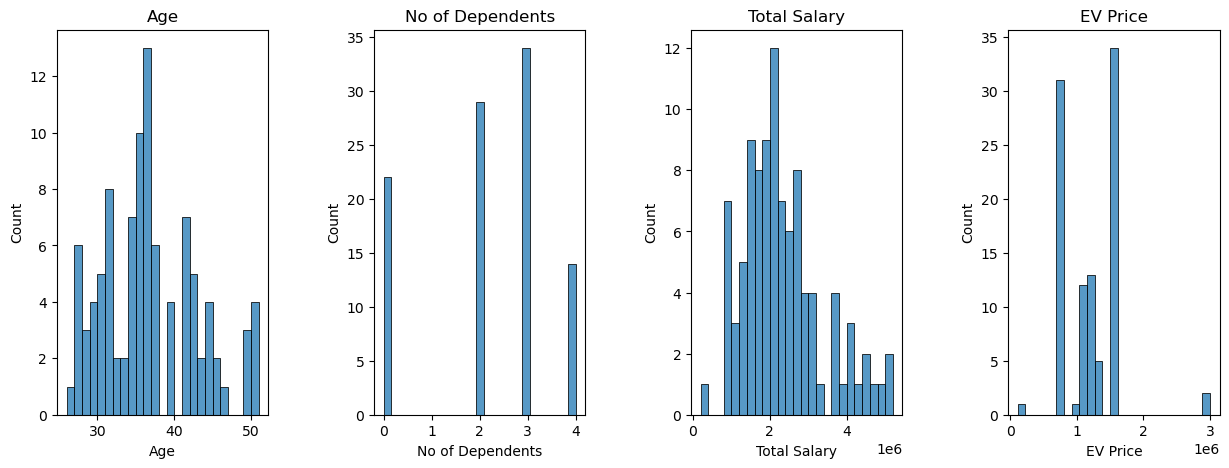

In [33]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(bdata[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [34]:
le = LabelEncoder()
bdata['Marrital Status'] = le.fit_transform(bdata['Marrital Status'])
bdata['Profession'] = le.fit_transform(bdata['Profession'])
bdata['Education'] = le.fit_transform(bdata['Education'])
bdata['Car_Loan'] = le.fit_transform(bdata['Car_Loan'])

In [35]:
bdata

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,2400000,1600000
95,50,1,0,1,3,0,5100000,1600000
96,51,0,0,0,2,1,2200000,1100000
97,51,1,0,1,2,0,4000000,1500000


Text(0.5, 1.0, 'Visualization of raw data')

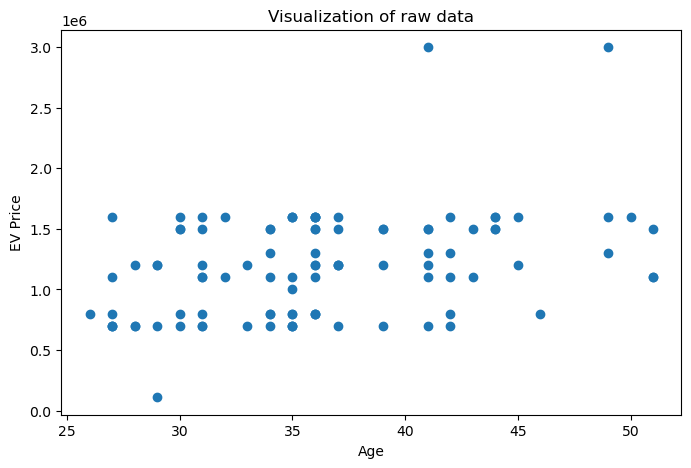

In [36]:
plt.figure(figsize = (8, 5))
plt.scatter(bdata.iloc[:, 0], bdata.iloc[:,-1])
plt.xlabel('Age')
plt.ylabel('EV Price')
plt.title('Visualization of raw data')

Text(0.5, 1.0, 'Visualization of raw data')

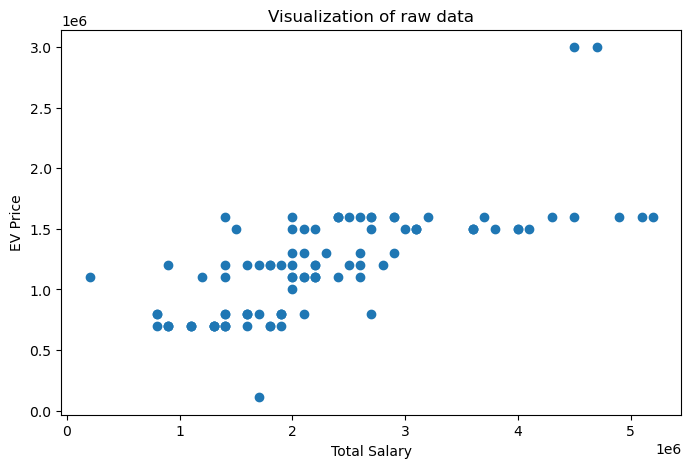

In [37]:
plt.figure(figsize = (8, 5))
plt.scatter(bdata.iloc[:, -2], bdata.iloc[:,-1])
plt.xlabel('Total Salary')
plt.ylabel('EV Price')
plt.title('Visualization of raw data')

In [38]:
scaler=StandardScaler()
bdata_scaled=scaler.fit_transform(bdata)

In [39]:
pd.DataFrame(bdata_scaled)

,0,1,2,3,4,5,6,7
0,-1.498630,0.739510,2.366432,0.876275,-1.642313,1.446980,-1.406760,-0.904843
1,-0.211304,0.739510,-0.422577,0.876275,-0.136859,1.446980,-0.258937,-0.445579
2,1.397855,-1.352247,-0.422577,-1.141195,1.368594,1.446980,-0.450240,0.013685
3,0.754191,-1.352247,-0.422577,0.876275,0.615867,-0.691095,-0.067633,0.013685
4,-0.854967,0.739510,-0.422577,0.876275,-0.136859,1.446980,0.314975,0.932213
...,...,...,...,...,...,...,...,...
94,-1.498630,-1.352247,2.366432,-1.141195,-1.642313,-0.691095,0.123671,0.932213
95,2.202434,0.739510,-0.422577,0.876275,0.615867,-0.691095,2.706274,0.932213
96,2.363350,-1.352247,-0.422577,-1.141195,-0.136859,1.446980,-0.067633,-0.215947
97,2.363350,0.739510,-0.422577,0.876275,-0.136859,-0.691095,1.654102,0.702581


In [40]:
pca= PCA()
pca.fit(bdata_scaled)

PCA()

In [41]:
pca.explained_variance_ratio_

array([0.34653101, 0.1920909 , 0.14332375, 0.11282393, 0.08822937,
       0.04894954, 0.04512684, 0.02292466])

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

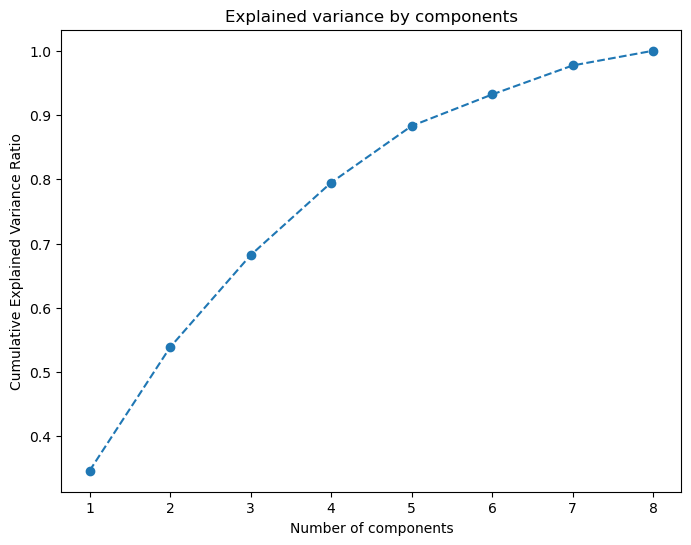

In [42]:
plt.figure(figsize= (8,6))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance Ratio")

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 4 components.

In [43]:
pca=PCA(n_components=4)
pca.fit(bdata_scaled)

PCA(n_components=4)

In [44]:
scores_pca= pca.transform(bdata_scaled)


`K Means clustering with PCA

In [45]:
wcss= []
for i in range(1,21):
    kmeans_pca= KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


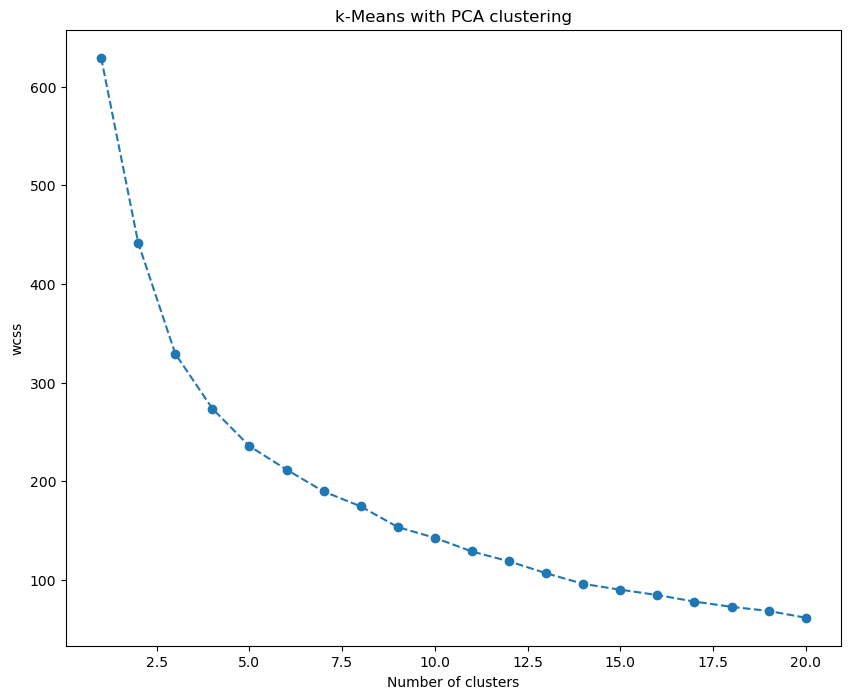

In [46]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('k-Means with PCA clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 5 clusters mark. So, we’ll be keeping a five-cluster solution.

In [47]:
kmeans_pca=KMeans(n_clusters=5, init = 'k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [48]:
pca_kmeans=pd.concat([bdata.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
pca_kmeans.columns.values[-4: ] = ['Component_1', 'Component_2', 'Component_3', 'Component_4']
pca_kmeans['segment k-means PCA'] = kmeans_pca.labels_
                      

In [49]:
pca_kmeans.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV Price,Component_1,Component_2,Component_3,Component_4,segment k-means PCA
0,27,1,1,1,0,1,800000,800000,-3.456779,0.618798,-1.775729,-0.151357,2
1,35,1,0,1,2,1,2000000,1000000,-0.274146,-0.658946,-1.695786,-0.042108,3
2,45,0,0,0,4,1,1800000,1200000,0.879912,-2.388637,0.925667,-0.363319,4
3,41,0,0,1,3,0,2200000,1200000,0.771649,-0.376038,0.757106,1.685393,4
4,31,1,0,1,2,1,2600000,1600000,0.219923,0.252808,-1.513077,-0.399144,3


In [50]:
pca_kmeans['segment'] = pca_kmeans['segment k-means PCA'].map({0: 'first',
                                                              1: 'second',
                                                              2: 'third',
                                                              3: 'fourth',
                                                              4: 'fifth'})

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


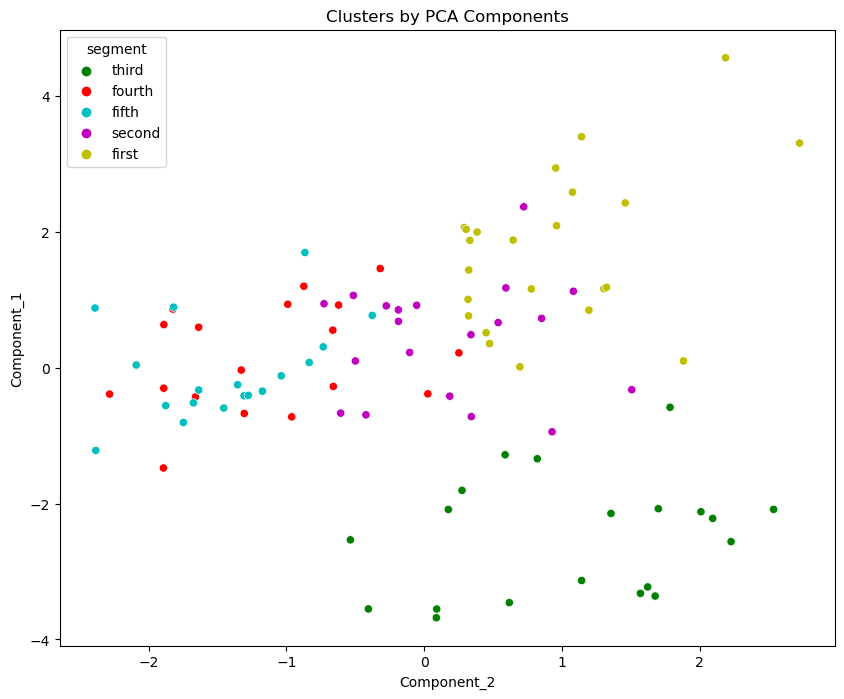

In [51]:
x_axis = pca_kmeans['Component_2']
y_axis = pca_kmeans['Component_1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=pca_kmeans['segment'], palette = ['g', 'r', 'c', 'm' ,'y'])
plt.title('Clusters by PCA Components')
plt.show()

In [52]:
Cluster_0 = pca_kmeans[pca_kmeans['segment k-means PCA']==0]
Cluster_1 = pca_kmeans[pca_kmeans['segment k-means PCA']==1]
cluster_3 = pca_kmeans[pca_kmeans['segment k-means PCA']==2]
cluster_4 = pca_kmeans[pca_kmeans['segment k-means PCA']==3]
cluster_5 = pca_kmeans[pca_kmeans['segment k-means PCA']==4]

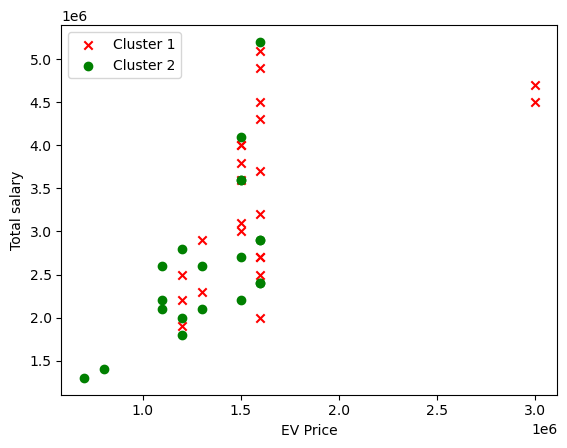

In [53]:
plt.scatter(Cluster_0['EV Price'], Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1['EV Price'], Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

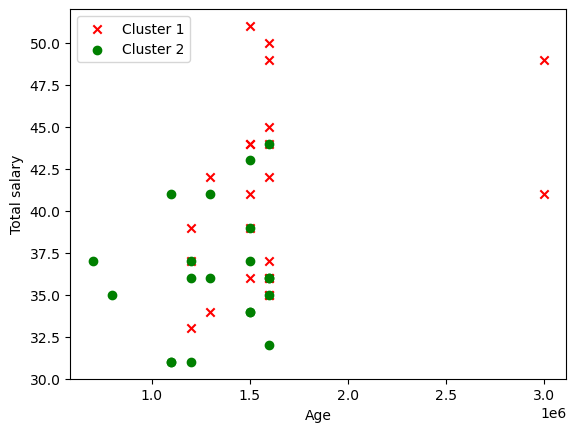

In [54]:
plt.scatter(Cluster_0['EV Price'], Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1['EV Price'], Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('Age')
plt.ylabel('Total salary')
plt.show()

Electric Vehicle Segmentation

In [55]:
car_data = pd.read_csv("ElectricCarData_Clean.csv")
car_data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [56]:
car_data['Brand']=le.fit_transform(car_data['Brand'])
car_data['Model']=le.fit_transform(car_data['Model'])
car_data['RapidCharge']=le.fit_transform(car_data['RapidCharge'])
car_data['PowerTrain'] = le.fit_transform(car_data['PowerTrain'])
car_data['PlugType'] = le.fit_transform(car_data['PlugType'])
car_data['BodyStyle'] = le.fit_transform(car_data['BodyStyle']) 
car_data['Segment'] = le.fit_transform(car_data['Segment'])


In [57]:
car_data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,7.5,160,330,191,440,1,1,2,1,2,5,45000
99,1,94,4.5,210,335,258,540,1,0,2,6,4,5,96050
100,20,8,5.9,200,325,194,440,1,0,2,1,2,5,50000
101,20,10,5.1,200,375,232,450,1,0,2,1,2,5,65000


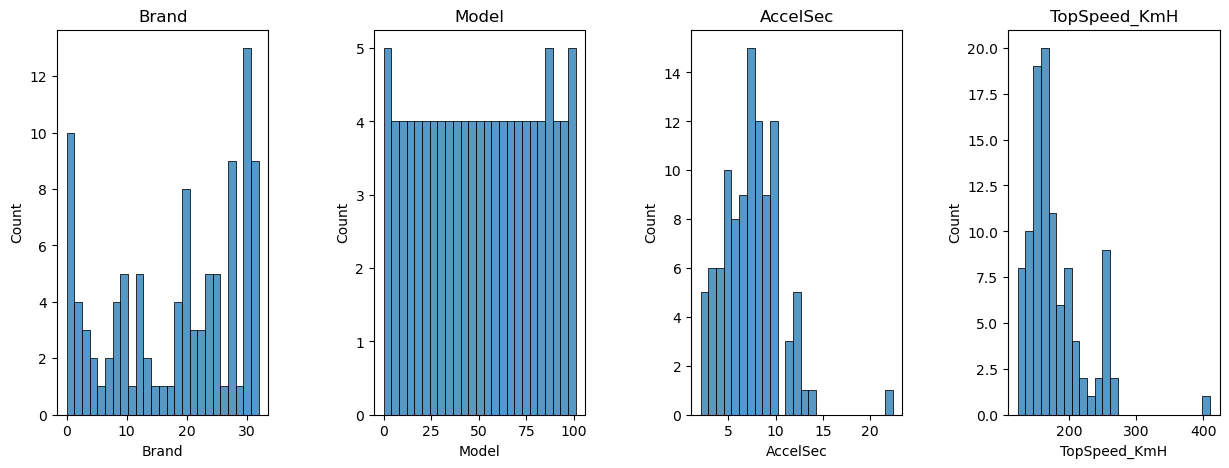

In [58]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Brand', 'Model' ,'AccelSec' ,'TopSpeed_KmH']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=1.0, wspace=0.5)
  sns.histplot(car_data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

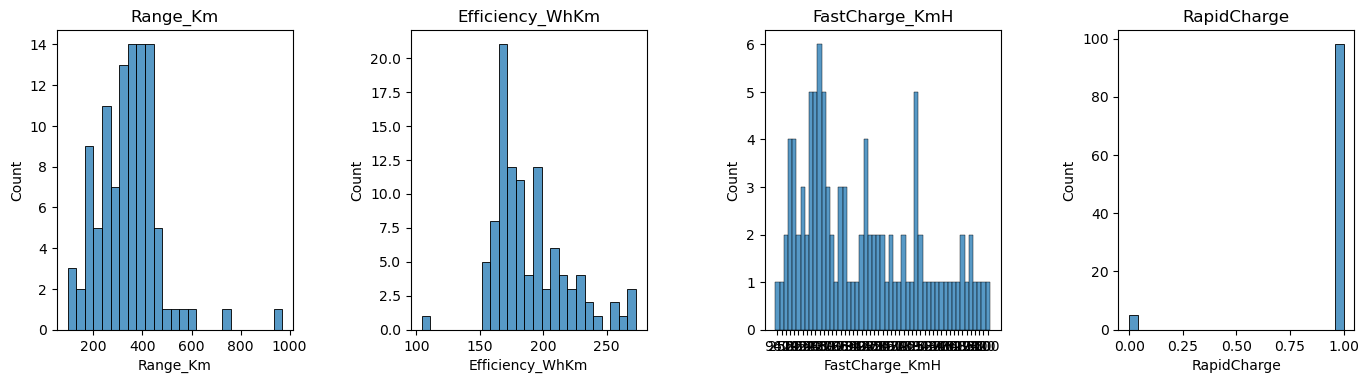

In [59]:
plt.figure(1, figsize=(35,35))
n=0

for x in ['Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge']:
  n += 1
  plt.subplot(5,8,n)
  plt.subplots_adjust(hspace=1.0, wspace=0.5)
  sns.histplot(car_data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

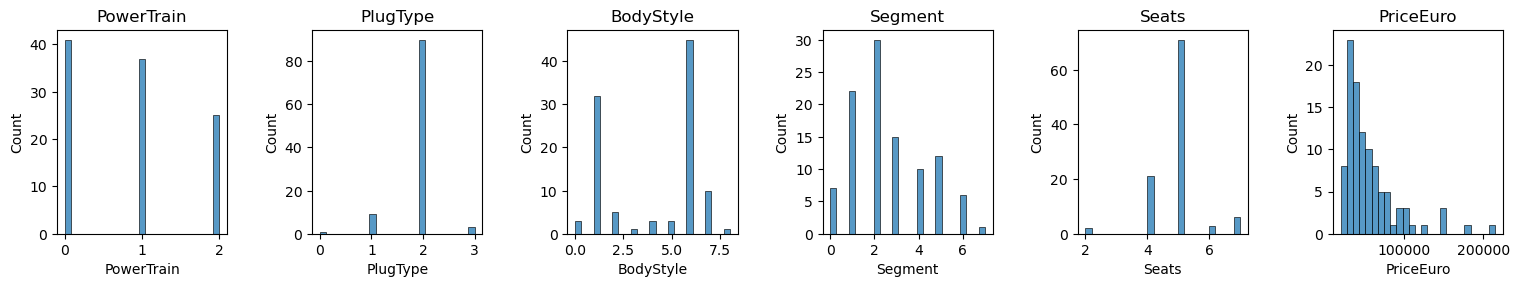

In [60]:
plt.figure(1, figsize=(45,45))
n=0

for x in ['PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']:
  n += 1
  plt.subplot(9,14,n)
  plt.subplots_adjust(hspace=1.0, wspace=0.5)
  sns.histplot(car_data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [61]:
car_data.corr()

C:\Users\rahul\AppData\Local\Temp\ipykernel_31284\605390074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data.corr()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,-0.401572,0.062730,0.101759,0.088316,-0.195901,-0.188137,0.056464,-0.231104,-0.275860,-0.002040,0.089589,-0.036023
Model,-0.401572,1.000000,-0.050635,0.067814,-0.066035,0.010976,0.144293,-0.007609,0.023750,0.261255,0.068414,-0.018943,0.169003
AccelSec,0.062730,-0.050635,1.000000,-0.786195,-0.677062,-0.382904,-0.514820,0.521011,-0.259657,-0.347164,-0.451568,-0.175335,-0.627174
TopSpeed_KmH,0.101759,0.067814,-0.786195,1.000000,0.746662,0.355675,0.251054,-0.560538,-0.010110,0.339230,0.670403,0.126470,0.829057
Range_Km,0.088316,-0.066035,-0.677062,0.746662,1.000000,0.313077,0.401290,-0.451495,0.131297,0.227477,0.628597,0.300163,0.674844
Efficiency_WhKm,-0.195901,0.010976,-0.382904,0.355675,0.313077,1.000000,0.105673,-0.394721,-0.028761,0.373146,0.623263,0.301230,0.396705
RapidCharge,-0.188137,0.144293,-0.514820,0.251054,0.401290,0.105673,1.000000,-0.274797,0.539160,0.223577,0.189954,0.423111,0.197208
PowerTrain,0.056464,-0.007609,0.521011,-0.560538,-0.451495,-0.394721,-0.274797,1.000000,-0.039763,-0.349484,-0.497850,-0.278882,-0.561584
PlugType,-0.231104,0.023750,-0.259657,-0.010110,0.131297,-0.028761,0.539160,-0.039763,1.000000,0.066463,-0.163959,-0.029570,-0.000193
BodyStyle,-0.275860,0.261255,-0.347164,0.339230,0.227477,0.373146,0.223577,-0.349484,0.066463,1.000000,0.415428,0.342489,0.321713


C:\Users\rahul\AppData\Local\Temp\ipykernel_31284\1840856028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


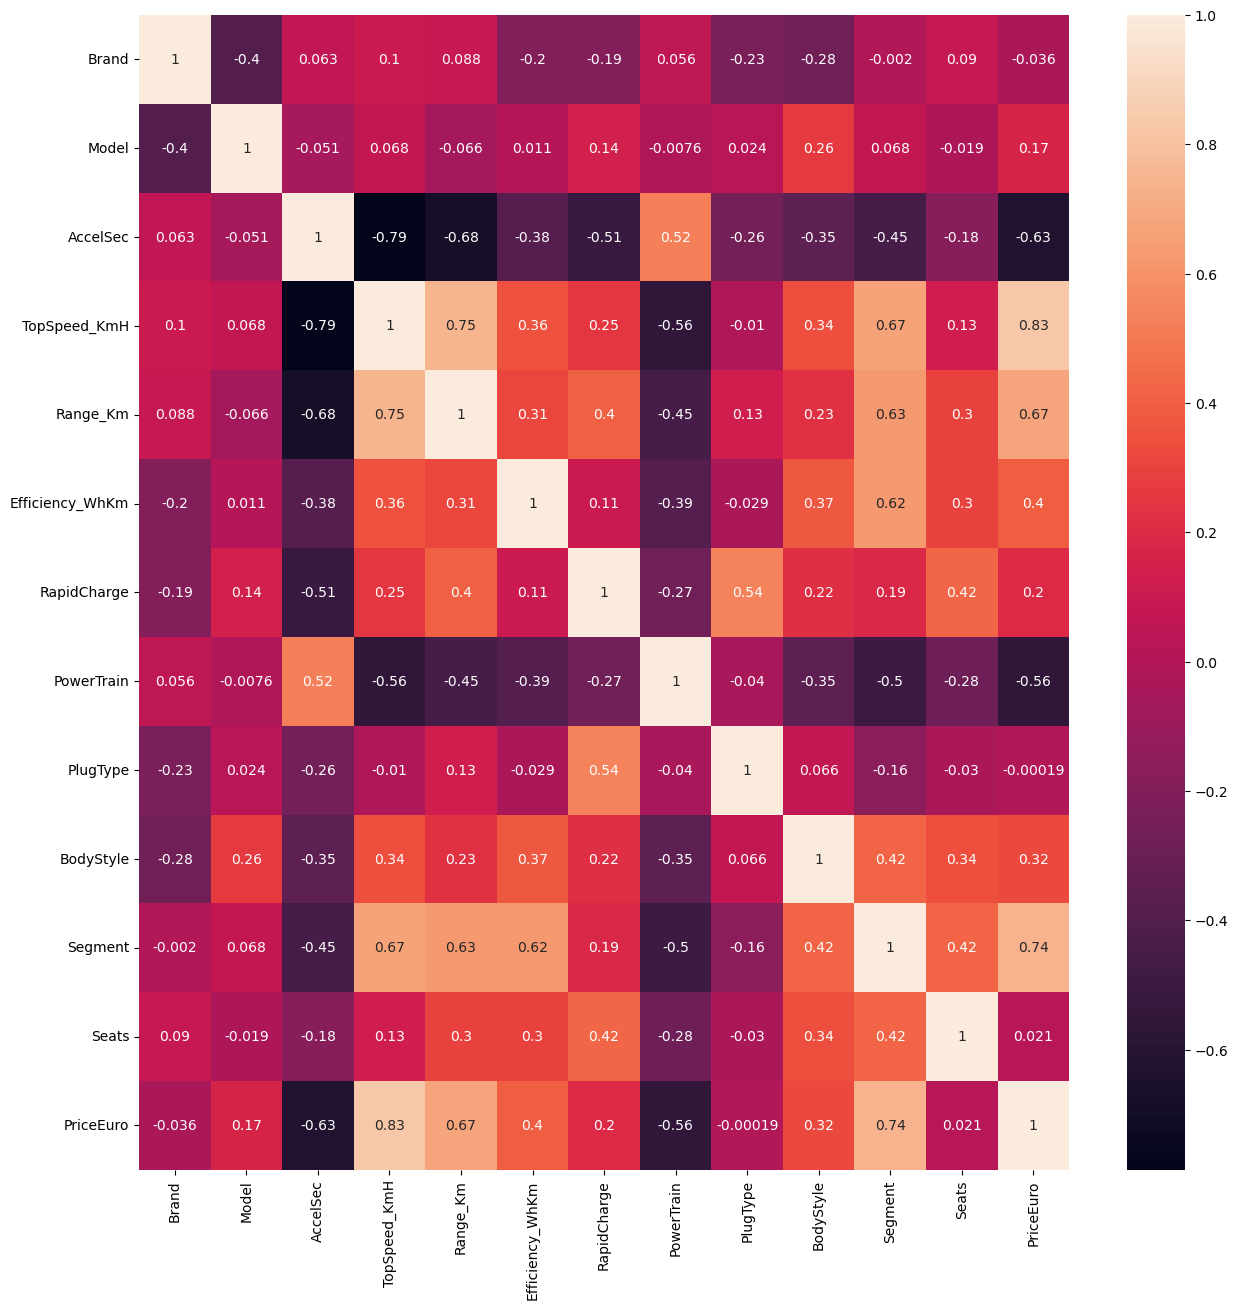

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(car_data.corr(), annot=True)
plt.show()